In [26]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import joblib
import pickle


In [2]:
df = pd.read_csv("data/nationality.csv")
df.head(3)

,Unnamed: 0,names,nationality
0,0,Gershon,yiddish
1,1,Lantz,yiddish
2,2,Zaide,yiddish


In [3]:
df.columns

Index(['Unnamed: 0', 'names', 'nationality'], dtype='object')

In [4]:
df.groupby('nationality')['names'].size()

nationality
african             100
african-american    100
american            100
arabic              100
armenian             17
celtic               62
chinese             100
czechoslovakian      38
danish               11
dutch                24
egyptian             30
english             100
finnish              13
french              100
gaelic               87
german              100
greek               100
hawaiian            100
hebrew              100
hindi               100
hungarian            64
indian               25
irish               100
italian             100
japanese            100
korean               16
latin               100
middle-english       45
native-american     100
norse                40
old-english         100
old-french           46
old-german           40
old-norse            28
persian              55
polish               48
polynesian           15
russian              85
sanskrit             28
scandinavian        100
scottish             74
slav

<Axes: xlabel='nationality'>

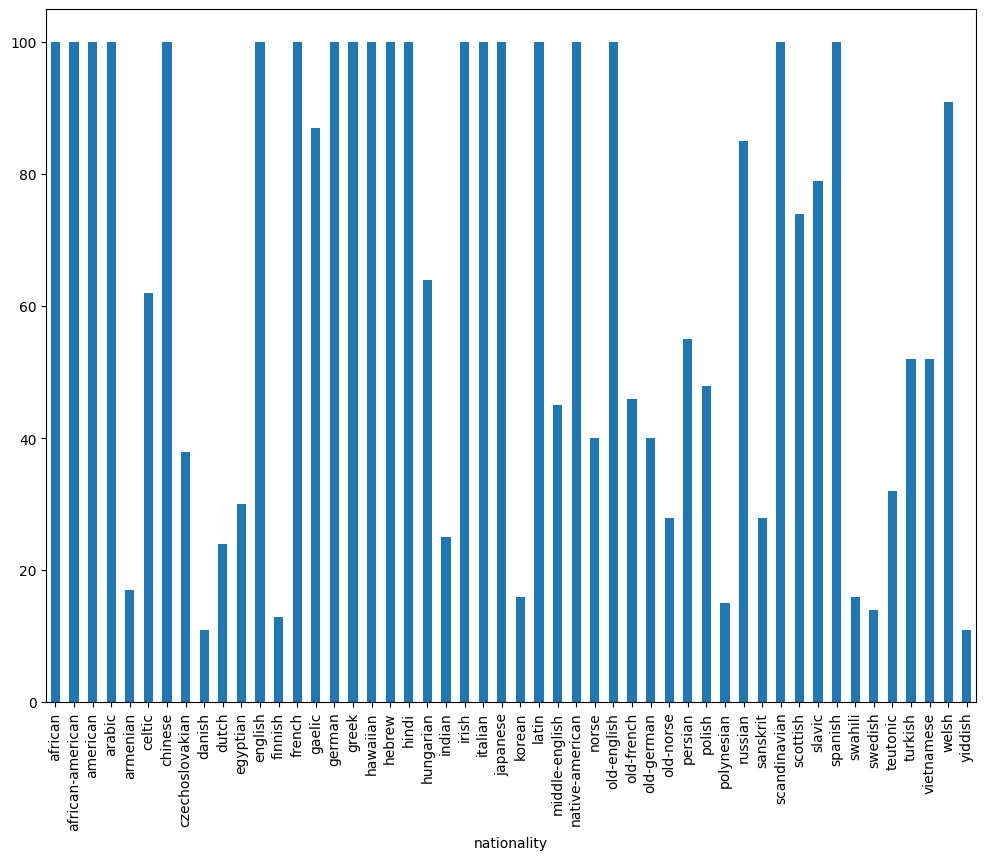

In [8]:
df.groupby('nationality')['names'].size().plot(kind='bar',figsize=(12,9))

In [10]:
Xfeatures = df['names']
ylabels= df['nationality']

vec = CountVectorizer()
X = vec.fit_transform(Xfeatures)

In [27]:
with open('model/vectorizer.pkl', 'wb') as f:
    pickle.dump(vec, f)

In [25]:
vec

CountVectorizer()

In [12]:
vec.get_feature_names_out()

array(['aaliyah', 'aari', 'aaron', ..., 'zygmunt', 'örkény', 'örs'],
      dtype=object)

In [13]:
x_train,x_test,y_train,y_test = train_test_split(X,ylabels,test_size=0.30)

In [15]:
x_train

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 2296 stored elements and shape (2266, 2973)>

In [16]:
# Build model
nb = MultinomialNB()
nb.fit(x_train,y_train)

MultinomialNB()

In [17]:
nb.score(x_test,y_test)

0.051440329218107

In [19]:
name1 = ["Yin","Bathsheba","Brittany","Vladmir"]
vector1 = vec.transform(name1).toarray()
nb.predict(vector1)

array(['chinese', 'hebrew', 'english', 'african-american'], dtype='<U16')

In [ ]:
# from sklearn.externals import joblib 
# nationality_predictor = open("model/naive_bayes.pkl","wb")
# joblib.dump(cv,nationality_vectorizer)
# nationality_predictor.close()

In [20]:
# Save model
import pickle
with open("model/naive_bayes.pkl","wb") as f:
    pickle.dump(nb, f)

In [30]:
nationality_naive_bayes = open("model/naive_bayes.pkl","rb")
nationality_cv = joblib.load(nationality_naive_bayes)

name1 = ["Yin","Bathsheba","Brittany","Vladmir"]
vec_test = joblib.load(open("model/vectorizer.pkl","rb"))

vec_test = vec.transform(name1).toarray()
nb.predict(vector1)

array(['chinese', 'hebrew', 'english', 'african-american'], dtype='<U16')